# Tutorial on Wake-Sleep and VAE

**Author**: [Lisa Lee](https://leelisa.com/)

This tutorial introduces the reader to the Wake-Sleep algorithm [1,2] and the Variational Autoencoder (VAE) [3, 4, 5].

*Note*: Please be careful not to publish solutions online, as this problem may be reused for future iterations of the [10-708 Probabilistic Graphical Model](https://sailinglab.github.io/pgm-spring-2019/) course.

### References

[1] Hinton et al., "The wake-sleep algorithm for
unsupervised neural networks", Science 1995. [[PDF](http://www.cs.toronto.edu/~fritz/absps/ws.pdf)]

[2] Dayan, "Helmholtz machines and wake-sleep learning", 2000. [[PDF](https://pdfs.semanticscholar.org/dd8c/da00ccb0af1594fbaa5d41ee639d053a9cb2.pdf)]

[3] Kingma & Welling, "Auto-encoding variational bayes", 2013. [[arXiv](https://arxiv.org/abs/1312.6114)]

[4] Doersch, "Tutorial on variational autoencoders", 2016. [[arXiv](https://arxiv.org/abs/1606.05908)]

[5] Jan Hendrick Metzen, "Variational Autoencoder in TensorFlow", 2015. [[Blog](https://jmetzen.github.io/2015-11-27/vae.html)].

# Part 1: Algorithm Derivations

In this section, you will derive the Wake-Sleep and VAE algorithms, both of which can be used to train a Helmholtz Machine.

This section is organized as follows:

1. Definition of Helmholtz Machine, and derivation of the **evidence lower bound objective (ELBO)**, which lowerbounds the data log-likelihood $\log p_\theta(\mathbf{x})$.

3. Derivation of the **Wake-Sleep** algorithm, which alternates between the Wake phase and Sleep phase to optimize an estimate of ELBO.

4. Derivation of **VAE**, which optimizes a stochastic estimate of ELBO.

## I. Variational Inference

Suppose we want to learn a directed latent variable model

<img src="https://iaml.it/blog/variational-autoencoders-1/images/iOOXa6P.png" alt="drawing" width="200"/>

that is able represent a complex distribution $p(\mathbf{x})$  over the data in the following form:
\begin{equation}
    p_{\boldsymbol \theta}(\mathbf{x}) = \int p_{\boldsymbol \theta}(\mathbf{x} \mid \mathbf{z}) p(\mathbf{z}) d\mathbf{z}
\end{equation}
where:
* The latent variables $\mathbf{z}$ are distributed according to a standard Gaussian prior $p(\mathbf{z}) = N(0, I)$.
* The data $\mathbf{x}$ are binary vectors. In other words, $p_{\boldsymbol \theta}(\mathbf{x} \mid \mathbf{z})$ can be modeled with a sigmoid belief net, so the likelihood is of the form $p_\theta(\mathbf{x}|\mathbf{z}) = \text{Bernoulli}( f_\theta (\mathbf{z}) )$.

*Note*: In MNIST,  the data points $\mathbf{x}$ take values in $[0, 1]$ rather than $\{ 0, 1\}$, but the loss term $\mathbb{E}_{q}[p_\theta(\mathbf{x} \mid \mathbf{z})]$ still uses sigmoid cross-entropy loss, which is a common practice [4].

### 1.1: Helmholtz Machine

The Helmholtz machine [2] is an architecture that can find hidden structure in data by learning a generative model of the data. 
It consists of two networks: the **recognition** network $q_\phi(\mathbf{z} \mid \mathbf{x})$ embeds the input data $\mathbf{x}$ into latent space, and the **generative** network $p_\theta(\mathbf{x} \mid \mathbf{z})$ reconstructs the data given a latent code $\mathbf{z}$.

<img src="https://ai2-s2-public.s3.amazonaws.com/figures/2017-08-08/666ab73d8095710b2d377e129f5e7959fcf62a9f/9-Figure1-1.png" alt="drawing" width="300"/>

More specifically, the Helmholtz machine tries to learn the **recognition** parameters $\phi$ and **generative** parameters $\theta$ such that $$
q_\phi(\mathbf{z} \mid \mathbf{x}) \approx p_\theta(\mathbf{z} \mid \mathbf{x}) \propto p_\theta(\mathbf{x}, \mathbf{z})
$$
where:

* $q_\phi(\mathbf{z} \mid \mathbf{x})$ is the variational distribution approximating the posterior distribution $p_\theta(\mathbf{z} \mid \mathbf{x})$ over the latents $\mathbf{z}$ given the data $\mathbf{x}$. Assume that the recognition network $q_\phi$ is parameterized by a Gaussian, i.e., $$
q_\phi(\mathbf{z} \mid \mathbf{x}) = N(\mathbf{z}; \mu_\phi(\mathbf{x}), \Sigma_\phi (\mathbf{x})).
$$

* $p_\theta(\mathbf{x}, \mathbf{z}) = p(\mathbf{z}) p_\theta(\mathbf{x} \mid \mathbf{z})$ is the joint probability of $(\mathbf{x}, \mathbf{z})$, where $p(\mathbf{z})=N(0,I)$ is the prior distribution over latents, and $p_\theta(\mathbf{x} \mid \mathbf{z})$ is the data likelihood.


Helmholtz machines are usually trained using unsupervised learning algorithms such as the classical **Wake-Sleep** algorithm [1, 2] or the modern **Variational Autoencoder (VAE)** [3, 4].

### 1.2: Evidence Lower Bound Objective (ELBO)

Suppose we want to approximate the posterior distribution $p_{\boldsymbol \theta}(\mathbf{z} \mid \mathbf{x})$ using some variational distribution $q_{\boldsymbol \phi}(\mathbf{z} \mid \mathbf{x})$. A tractable way to learn this model is to optimize the **evidence lower bound objective (ELBO)**, also known as the variational lower bound, defined as follows:
$$
\mathcal{L}(\mathbf{x})
= \mathbb{E}_{\mathbf{z} \sim q_\phi(\mathbf{z} \mid \mathbf{x})} [\log p_\theta(\mathbf{x}, \mathbf{z}) - \log q_\phi(\mathbf{z} \mid \mathbf{x})]
= \int_z q_\phi(\mathbf{z} \mid \mathbf{x}) \log \frac{p_\theta(\mathbf{x}, \mathbf{z})}{q_\phi(\mathbf{z} \mid \mathbf{x})} d \mathbf{z}
\tag{1}
$$


#### Exercise 1.2.1: ELBO

For a single data point $\mathbf{x}^{(i)}$, prove that
$$
    \log p_\theta(\mathbf{x}^{(i)})
    \geq \mathcal{L}(\mathbf{x}^{(i)}).
$$


#### Section 1.2.2: Lower Bound on the Data Log-Likelihood
The above result shows that, for iid data points $\mathbf{x} = \{\mathbf{x}^{(i)}\}_{i=1}^N$,
$$
    \log p_\theta(\mathbf{x}) \stackrel{\text{iid}}{=} \sum_{i=1}^N \log p_\theta(\mathbf{x}^{(i)})
    \geq \sum_{i=1}^N \mathcal{L}(\mathbf{x}^{(i)})
    = \mathcal{L}(\mathbf{x})
$$
which gives the ELBO $\mathcal{L}(\mathbf{x})$ on the data log-likelihood $\log p_\theta(\mathbf{x})$. Thus, maximizing this lower bound $\mathcal{L}(\mathbf{x})$ forces the true objective $p_\theta(\mathbf{x})$ to be optimized.


### 1.3: A Tighter Lower Bound

To compare trained models, we could simply look at the values of the ELBO. However, the bound could be loose and hence the numbers could be misleading. Here, we derive and prove a tighter approximation of the lower bound on the marginal likelihood, defined as follows:
$$
\mathcal{L}_k(\mathbf{x}) = \mathbb{E}_{\mathbf{z}^{(1)}, \dots, \mathbf{z}^{(k)} \sim q_{\mathbf{\phi}}(\mathbf{z} \mid \mathbf{x})} \left[ \log \frac{1}{k} \sum_{i=1}^k \frac{p_{\mathbf{\theta}}(\mathbf{x}, \mathbf{z}^{(i)})}{q_{\mathbf{\phi}}(\mathbf{z}^{(i)} \mid \mathbf{x})} \right]
\tag{2}
$$
    
In Part 2, you will use this alternate lower bound $\mathcal{L}_k(\mathbf{x})$ in Eq. (2) to **evaluate** trained models. For **training** Wake-Sleep and VAE, you will optimize the ELBO $\mathcal{L}(\mathbf{x})$ in Eq. (1).

#### Exercise 1.3.1

Prove that $\log p(\mathbf{x}) \geq \mathcal{L}_{k}(\mathbf{x})$ for any $k \in \mathbb{N}$. (*Hint*: Use Jensen's inequality.)

#### Exercise 1.3.2

Prove that $\mathcal{L}_{k+1}(\mathbf{x}) \geq \mathcal{L}_{k}(\mathbf{x})$ for any $k \in \mathbb{N}$. You can use the following lemma without proof:
    
*Lemma*: Let $I_k \subset [k+1] := \{1, \ldots, k+1\}$ with $|I_k| = k$ be a uniformly distributed subset of distinct indices from $[k+1]$. Then for any sequence of numbers $a_1, \ldots, a_{k+1}$,
$$
    \mathbb{E}_{I_k} \left[ \sum_{i \in I_k} a_i \over k \right] 
    = { \sum_{i=1}^{k+1} a_i \over k+1}
$$

#### Exercise 1.3.3

The above two results show that
$$
\log p(\mathbf{x})
\geq \mathcal{L}_{k+1}(\mathbf{x})
\geq \mathcal{L}_{k}(\mathbf{x}).
$$
However, prove that the above inequalities do not guarantee $\mathcal{L}_k(\mathbf{x}) \rightarrow \log p(\mathbf{x})$ when $k \rightarrow \infty$. (*Hint*: Provide a counterexample.)

## II. Wake-Sleep

In this section, we will derive the optimization objectives for the Wake-Sleep algorithm, which decomposes the optimization procedure into two phases:

* **Wake-phase**: Given recognition weights $\phi$, we activate the recognition process and update the generative weights $\theta$ to increase the probability that they would reconstruct the correct activity vector in the layer below.
* **Sleep-phase**: Given generative weights $\theta$, we activate the generative process and update the recognition weights $\phi$ to increase the probability that they would produce the correct activity vector in the layer above. Since it has generated the instance, it knows the true underlying causes, and therefore has available the target values for the hidden units that are required to train the bottom-up weights $\phi$.

### 2.1: Wake-phase

The Wake-phase fixes the recognition weights $\phi$ and optimizes a Monte Carlo estimate of ELBO w.r.t. the generative weights $\theta$.

#### Exercise 2.1.1: Wake objective

Given $N$ iid data points $\mathbf{x} = \{\mathbf{x}^{(i)}\}_{i=1}^N$, show that
$$
\theta^* := \underset{\theta}{\text{arg max}}  \mathcal{L}(\mathbf{x}) = \underset{\theta}{\text{arg max}} \sum_{i=1}^N \mathbb{E}_{\mathbf{z} \sim q_\phi(\mathbf{z} \mid \mathbf{x}^{(i)})} \log p_\theta(\mathbf{x}^{(i)} \mid \mathbf{z})
\tag{3}
$$
which gives the Wake-phase objective.

#### Section 2.1.2: Psuedocode

Given $N$ iid data points $\{\mathbf{x}^{(i)}\}_{i=1}^N$, do the following for each $i \in [N]$:
1. Feed $\mathbf{x}^{(i)}$ into the recognition network to get $\mu_\phi(\mathbf{x}^{(i)})$ and $\Sigma_\phi(\mathbf{x}^{(i)})$.
2.  Draw $L$ samples {\color{blue}$\mathbf{z}^{(i)}_1, \ldots, \mathbf{z}^{(i)}_L  \sim q_\phi(\mathbf{z} \mid \mathbf{x}^{(i)}) = N(\mathbf{z}; \mu_\phi(\mathbf{x}^{(i)}), \Sigma_\phi (\mathbf{x}^{(i)}))$ }.
3. For each $l \in [L]$, feed $\mathbf{z}^{(i)}_l$ into the generative network to get $f_\theta(\mathbf{z}^{(i)}_l)$ for the likelihood $p_\theta(\mathbf{x} \mid \mathbf{z}^{(i)}_l) = \text{Bernoulli}( \mathbf{x} ; f_\theta( \mathbf{z}^{(i)}_l ))$.

Finally, use SGD to maximize
$$
\max_\theta \sum_{i=1}^N {1 \over L} \sum_{l=1}^L \log p_\theta(\mathbf{x}^{(i)} \mid \mathbf{z}^{(i)}_l)
\tag{4}
$$

This gives a Monte Carlo estimate of the Wake-phase objective in Eq. (3).

### 2.2: Sleep-phase


The Sleep phase fixes the generative weights $\theta$ and updates the recognition weights $\phi$. It is generally intractable to directly minimize the KL-divergence term in $\mathcal{L}(\mathbf{x})$ w.r.t. $\phi$:
$$
    \underset{\phi}{\arg \min} \; KL \left[ q_{\phi}(\mathbf{z} \mid \mathbf{x}) \middle\| p_\theta(\mathbf{z} \mid \mathbf{x}) \right] 
    = \underset{\phi}{\arg \min} \int_{\mathbf{z}} q_\phi(\mathbf{z} \mid \mathbf{x}) \log { q_\phi(\mathbf{z} \mid \mathbf{x}) \over p_\theta(\mathbf{z} \mid \mathbf{x}) } \; d\mathbf{z}
$$
    So instead, the Sleep phase minimizes the KL divergence the wrong way round,
$$
    \arg \min_\phi KL \left[ p_\theta(\mathbf{z} \mid \mathbf{x}) \middle\| q_{\phi}(\mathbf{z} \mid \mathbf{x}) \right].
$$


#### Exercise 2.2.1: Sleep objective

Suppose we sample $\mathbf{z} \sim p(\mathbf{z}) = N(0, I)$, then sample $\mathbf{x} \sim p_\theta(\mathbf{x} \mid \mathbf{z})$. Show that
$$
    \phi^* := \underset{\phi}{\arg \min} KL \left[ p_\theta(\mathbf{z} \mid \mathbf{x}) \middle\| q_{\phi}(\mathbf{z} \mid \mathbf{x}) \right]
    = \underset{\phi}{\arg \max} \mathbb{E}_{
    {p_\theta(\mathbf{x}, \mathbf{z})}
    } \left[ \log q_\phi(\mathbf{z} \mid \mathbf{x}) \right]
\tag{5}
$$
which gives the Sleep-phase objective.


#### Section 2.2.2: Pseudocode

Let $L \in \mathbb{N}$ be a sample size hyperparameter. For each $l \in [L]$, do the following:
1. Draw $\mathbf{z}^l \sim N(0,I)$.
2. Sample $\mathbf{x}^l$ from the generative network $p_\theta(\mathbf{x} \mid \mathbf{z}^l) = \text{Bernoulli}(f_\theta(\mathbf{z}^l))$.
3. Feed $\mathbf{x}^l$ into the recognition network to get $\mu(\mathbf{x}^l)$ and $\Sigma(\mathbf{x}^l)$.
4. Compute $q_\phi(\mathbf{z}^l \mid \mathbf{x}^l) = N(\mathbf{z}^l; \mu(\mathbf{x}^l), \Sigma(\mathbf{x}^l))$.

Finally, do SGD to maximize
$$
\max_\phi {1 \over L} \sum_{l=1}^L \log q_\phi( \mathbf{z}^l \mid \mathbf{x}^l )
\tag{6}
$$

This gives a Monte Carlo estimate of the Sleep-phase objective in Eq. (5).


## III. Variational Autoencoders

In this section, you will derive the optimization procedure for the VAE. Unlike Wake-Sleep, VAE
avoids the two-stage optimization procedure and instead optimizes a stochastic estimate of ELBO directly w.r.t. to parameters $\theta$ of the generative model (generation network) and parameters $\phi$ of the variational distribution (recognition network).

### 3.1: Objective Function

#### Exercise 3.1.1: Rewriting ELBO

For a given data point $\mathbf{x}^{(i)}$, show that ELBO can be rewritten as
$$
    \mathcal{L}(\mathbf{x}^{(i)})
    = -  KL \left[ q_{\phi}(\mathbf{z} \mid \mathbf{x}) \middle\| p_\theta(\mathbf{z} \mid \mathbf{x}) \right]  + \mathbb{E}_{\mathbf{z} \sim q_\phi(\mathbf{z} \mid \mathbf{x}^{(i)})} [\log p_\theta(\mathbf{x}^{(i)} \mid \mathbf{z}) ].
\tag{7}
$$

#### Section 3.1.2: Stochastic estimator for ELBO

Equation (7) gives a stochastic estimator for ELBO:
$$
\tilde{\mathcal{L}}(\mathbf{x}^{(i)})
= -  KL \left[ q_{\phi}(\mathbf{z} \mid \mathbf{x}) \middle\| p_\theta(\mathbf{z} \mid \mathbf{x}) \right] + \frac{1}{L} \sum_{l=1}^L [\log p_\theta(\mathbf{x}^{(i)} \mid \mathbf{z}^{(i, l)}) ]
\tag{8}
$$
where $\{ \mathbf{z}^{(i,l)} \}_{l=1}^L$ are sampled from $q_\phi(\mathbf{z} \mid \mathbf{x}^{(i)})$. The VAE algorithm optimizes this stochastic estimate of ELBO using a Monte Carlo gradient estimate.

In order to optimize the VAE objective in Eq. (8) efficiently, we use a **reparameterization trick** to rewrite  $\mathbb{E}_{q_\phi(\mathbf{z} \mid \mathbf{x})}[\cdot]$ such that the Monte Carlo estimate of the expectation is differentiable w.r.t. $\phi$. More specifically, we reparameterize the latent variable
$$
\mathbf{z} \sim q_\phi(\mathbf{z} \mid \mathbf{x}^{(i)}) = N(\mathbf{z} \mid \mu_\phi(\mathbf{x}^{(i)}),  \Sigma_\phi^2(\mathbf{x}^{(i)}) )
$$
as a deterministic function of the input $\mathbf{x}^{(i)}$ and an auxiliary noise variable $\epsilon$:
$$
\mathbf{z} = \mu_\phi(\mathbf{x}^{(i)}) + \Sigma_\phi(\mathbf{x}^{(i)}) \odot \epsilon
\qquad\qquad \epsilon \sim N(0, I)
$$
where $\odot$ signifies an element-wise product, and $\Sigma_\phi(\mathbf{x}^{(i)})$ is a vector of the same size as $z$.


#### Exercise 3.1.3: VAE objective

Using this reparameterization, show that the VAE objective in Eq. (8) can be rewritten as
$$
\tilde{\mathcal{L}}(\mathbf{x}^{(i)})
= {1 \over 2} \sum_{j=1}^J \left( 1 + \log( \Sigma_{(i),j}^2 ) - \mu_{(i),j}^2 - \Sigma_{(i),j}^2 \right) + {1 \over L} \sum_{l=1}^L \log p_\theta(\mathbf{x}^{(i)} \mid \mathbf{z}^{(i, l)})
\tag{9}
$$
where $\mu_{(i)} := \mu_\phi(\mathbf{x}^{(i)})$ and $\Sigma_{(i)} := \Sigma_\phi(\mathbf{x}^{(i)})$. 


### 3.2: Training Algorithm

The VAE optimization procedure works as follows:
1. For each $l \in [L]$, draw $\epsilon^{(l)} \sim N(0, I)$, and compute $\mathbf{z}^{(i,l)} := \mu_{(i)} + \Sigma_{(i)} \odot \epsilon^{(l)}$. 
2. Optimize the VAE objective in Eq. (9) w.r.t. $\mu$, $\Sigma$, and $\theta$.

#### Exercise 3.2.1: Derivatives of the VAE objective

Derive the gradients of the VAE objective in Eq. (9) w.r.t. $\mu_{(i),j}$, $\Sigma_{(i),j}$, and $\theta$.

### 3.3: Concluding Remarks

VAE is an elegant way to link directed graphical models to neural networks, and is theoretically appeasing because we optimise a (stochastic estimate of the) bound on the likelihood of the data. If the approximations made while performing variational bayes are valid, the training algorithm is guaranteed to increase the likelihood of the generative model. Moreover, there is a clear and recognized way to evaluate the quality of the model using the log-likelihood (either estimated by importance sampling or lower-bounded).

For i.i.d. datasets with continuous latent variables per datapoint, posterior inference for VAE can be made especially efficient by fitting an approximate inference model (also called a recognition model) to the intractable posterior using the proposed lower bound estimator.

## IV. Short-answer questions


#### Exercise 4.1: Wake-Sleep

Wake-Sleep requires a concurrent optimization of two objective functions, which together do not correspond to the optimization of (a bound of) the marginal likelihood. There is no guarantee that optimizing the Wake-Sleep objectives leads to a decrease in the free energy because:

(Choose 0-2 of the following choices)

1. The sleep phase trains the recognition model to invert the generative model for input vectors that are distributed according to the generative model rather than according to the real data.
2. The sleep phase learning does not follow the correct gradient.


#### Exercise 4.2: Discrete Latent Variables

 Between Wake-Sleep and VAE, which algorithm(s) can be applied to models with discrete latent variables?


#### Exercise 4.3: Computational Complexity
 
(True or False) Wake-Sleep and VAE have the same computational complexity per datapoint.

# Part 2: Implementation

This section contains a working implementation of the Variational Autoencoder (VAE) [5]. All provided code will run as is, but you will need to complete the following TODO's:

1. Implement the Wake-Sleep algorithm by modifying the provided AEVB code.
2. Implement the alternate lower bound metric from Section 1.3:
$$
\mathcal{L}_k(\mathbf{x}) = \mathbb{E}_{\mathbf{z}^{(1)}, \dots, \mathbf{z}^{(k)} \sim q_{\mathbf{\phi}}(\mathbf{z} \mid \mathbf{x})} \left[ \log \frac{1}{k} \sum_{i=1}^k \frac{p_{\mathbf{\theta}}(\mathbf{x}, \mathbf{z}^{(i)})}{q_{\mathbf{\phi}}(\mathbf{z}^{(i)} \mid \mathbf{x})} \right]
$$
3. Run experiments on the MNIST handwritten digits dataset.
4. Submit your modified .ipynb notebook (containing your Wake-Sleep and $\mathcal{L}_k$ implementations) on Gradescope. (In Colab: Select "File" > "Download .ipynb" to download the notebook, then upload the notebook to Gradescope.)

Please be careful not to publish your solutions on the web. By default, your Colab notebooks are set to private.

## I. Preliminaries

In [1]:
%tensorflow_version 1.x
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
import sys

np.random.seed(0)
tf.set_random_seed(0)

TensorFlow 1.x selected.


The following code downloads the MNIST dataset. (You can ignore the warnings for this assignment.)

In [2]:
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
mnist = read_data_sets('mnist', one_hot=True)

# Print dataset shapes.
# - Images are 28 x 28.
# - Labels are one of 10 digits, {0, 1, ..., 9}.
print()
print('Train images shape:', mnist.train.images.shape)
print('Train labels shape:', mnist.train.labels.shape)

print('Test images shape:', mnist.test.images.shape)
print('Test labels shape:', mnist.test.labels.shape)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.

Train images shape: (55000, 784)
Train labels shape: (55000, 10)
Test images shape: (10000, 784)
Test labels shape: (10000, 10)


Now you can play around with the MNIST dataset. Below, we provide a function to visualize the 28 x 28 image matrices.

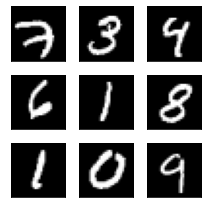

In [3]:
def plot_mnist(X, nrows=10, ncols=10):
    """
    Plots the given MNIST digits on a grid of size (nrows x ncols).
    """
    N = len(X)
    assert N <= nrows * ncols

    # Plot each 28 x 28 image.
    plt.figure(figsize=(nrows, ncols))
    for i in range(N):
        x = X[i].reshape(28, 28)

        plt.subplot(nrows, ncols, i + 1)
        fig = plt.imshow(x, vmin=0, vmax=1, cmap="gray")

        # Hide axes. (Both x-axis and y-axis range from 0 to 27.)
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)

    plt.tight_layout()
    plt.show()
    
    # If you want to save the plot using plt.savefig(fig_path), please
    # follow the instructions above (under "How to save files").

# Plot digits.
plot_mnist(mnist.train.images[:9], nrows=3, ncols=3)

## II. Implementation

We now define a class "VariationalAutoencoder" that implements the AEVB learning algorithm. The VAE is trained incrementally with mini-batches using partial fit. The trained model can be used to reconstruct unseen input, generate new samples, and map inputs to the latent space.

Model specification:

* Both the generative network $p_{\mathbf{\theta}}(\mathbf{x} \mid \mathbf{z})$ and the recognition network $q_{\mathbf{\phi}}(\mathbf{z} \mid \mathbf{x})$ are parametrized by neural networks with one hidden layer that consists of 512 ReLU neurons and a latent space dimension of 2. The weights are initialized by sampling from $\mathcal{N}(0, 0.01)$, and biases are initialized to zeros.

* Since $\mathbf{x}$'s take values in [0, 1], the output layer of the generation network that represents $p_{\mathbf{\theta}}(\mathbf{x} \mid \mathbf{z})$ should consist of sigmoid neurons.

* The variational distribution $q_{\mathbf{\phi}}(\mathbf{z} \mid \mathbf{x})$ is represented by a Gaussian of the form $\mathcal{N}(\mathbf{z}; \mathbf{\mu}_{\mathbf{\phi}}(\mathbf{x}), \mathbf{\Sigma}^2_{\mathbf{\phi}}(\mathbf{x})I)$, where $\mathbf{\mu}_{\mathbf{\phi}}(\mathbf{x})$ and $\mathbf{\Sigma}_{\mathbf{\phi}}(\mathbf{x})$ are linear outputs of the recognition network.

### TODO's
The code will run as is, but you will later need to implement the following TODO's specified throughout the code:

1. Wake-Sleep algorithm.  You just need to fill in the TODO's inside the VariationalAutoencoder class, under the "if self.algo == 'wake-sleep':" statements in the class methods _create_network(), _create_loss_optimizer(), and _partial\_fit(). The remaining parts (e.g., architectures for the recognition and generation networks) should remain the same.
  - You may need different learning rates for the Wake-phase and Sleep-phase. In the reference implementation, we used learning rates 1e-3 for the Wake-phase and 1e-5 for the Sleep-phase. We used a sample size of 100 to compute the Monte Carlo estimate of the gradient for the Sleep objective.
  - The optional argument "var_list" in tf.train.AdamOptimizer() lets you specify a list of tf.Variable to update to minimize the loss.

2. Computation of the lower bound $\mathcal{L}_k$ as defined in Section 1.4:
$$
\mathcal{L}_k(\mathbf{x}) = \mathbb{E}_{\mathbf{z}^{(1)}, \dots, \mathbf{z}^{(k)} \sim q_{\mathbf{\phi}}(\mathbf{z} \mid \mathbf{x})} \left[ \log \frac{1}{k} \sum_{i=1}^k \frac{p_{\mathbf{\theta}}(\mathbf{x}, \mathbf{z}^{(i)})}{q_{\mathbf{\phi}}(\mathbf{z}^{(i)} \mid \mathbf{x})} \right]
$$

In [0]:
class VariationalAutoencoder():
    def __init__(self, algo='vae', learning_rate=0.001, k=100, ckpt_path=""):
        """
        Args:
          algo (str): The algorithm. Value must be 'vae' or 'wake-sleep'.
          learning_rate (float): The learning rate.
          k (int): Used to compute L_k as defined in Section 1.4.
          ckpt_path (str): Model checkpoint path
        """
        assert algo in ['vae', 'wake-sleep']
        self.algo = algo
        self.learning_rate = learning_rate
        self.lr_wake = 1e-3
        self.lr_sleep = 1e-5
        self.k = k

        self.z_dim = 2         # Latent space dimension
        self.input_size = 784  # MNIST image size: 28*28

        self._create_network()
        self._create_loss_optimizer()

        init = tf.global_variables_initializer()
        self.saver = tf.train.Saver()
        self.sess = tf.InteractiveSession()

        if ckpt_path:
            self.load_model(ckpt_path)
        else:
            self.sess.run(init)

    def _init_weights(self, in_dim, out_dim):
        """Return random values of shape (in_dim, out_dim) from a gaussian
        N(0, 0.01) distribution."""
        return tf.random_normal((in_dim, out_dim), mean=0.0, stddev=0.1,
                                dtype=tf.float32)

    def _initialize_weights(self, n_hidden_r=512, n_hidden_g=512):
        network_weights = dict()
        network_weights['weights_r'] = {
            'h1': tf.Variable(self._init_weights(self.input_size, n_hidden_r)),
            'out_mean': tf.Variable(self._init_weights(n_hidden_r, self.z_dim)),
            'out_log_sigma': tf.Variable(
                self._init_weights(n_hidden_r, self.z_dim))
        }
        network_weights['biases_r'] = {
            'b1': tf.Variable(tf.zeros([n_hidden_r], dtype=tf.float32)),
            'out_mean': tf.Variable(tf.zeros([self.z_dim], dtype=tf.float32)),
            'out_log_sigma': tf.Variable(
                tf.zeros([self.z_dim], dtype=tf.float32))
        }
        network_weights['weights_g'] = {
            'h1': tf.Variable(self._init_weights(self.z_dim, n_hidden_g)),
            'out_mean': tf.Variable(
                self._init_weights(n_hidden_g, self.input_size)),
            'out_log_sigma': tf.Variable(
                self._init_weights(n_hidden_g, self.input_size))
        }
        network_weights['biases_g'] = {
            'b1': tf.Variable(tf.zeros([n_hidden_g], dtype=tf.float32)),
            'out_mean': tf.Variable(
                tf.zeros([self.input_size], dtype=tf.float32)),
            'out_log_sigma': tf.Variable(
                tf.zeros([self.input_size], dtype=tf.float32))
        }
        return network_weights

    def _create_network(self):
        # Input MNIST images
        self.x = tf.placeholder(tf.float32, [None, self.input_size])

        # Initialize autoencoder network weights and biases.
        self.network_weights = self._initialize_weights()

        # Use recognition network to determine mean and (log) variance of the
        # Gaussian distribution in latent space.
        #   z_mean:         (batch_size, 2)
        #   z_log_sigma_sq: (batch_size, 2)
        self.z_mean, self.z_log_sigma_sq = self._recognition_network(
            self.x,
            self.network_weights["weights_r"],
            self.network_weights["biases_r"])

        # Draw one sample z from Gaussian distribution.
        batch_size = tf.shape(self.x)[0]
        eps = tf.random_normal((batch_size, self.z_dim), 0, 1, 
                               dtype=tf.float32)
        # z = mu + sigma * epsilon
        self.z = tf.add(self.z_mean, 
                        tf.multiply(tf.sqrt(tf.exp(self.z_log_sigma_sq)), eps))

        # Use generator to determine the mean of the Bernoulli distribution of
        # the reconstructed input [B, input_size]
        self.x_reconstr_mean = self._generator_network(
            self.z,  # [B * L, 2]
            self.network_weights["weights_g"],
            self.network_weights["biases_g"])

        if self.algo == 'wake-sleep':
            # TODO: You may need to add variables for the sleep-phase.
            self.l_sleep = 100
            self.z_sleep = tf.random_normal((batch_size* self.l_sleep, self.z_dim),
                                            0, 1, dtype=tf.float32)
            #[B*L, input_size]
            self.x_reconstr_mean_sleep = self._generator_network(
                self.z_sleep,  
                self.network_weights["weights_g"],
                self.network_weights["biases_g"])
            
            self.x_sleep = tfp.distributions.Bernoulli(
                probs=self.x_reconstr_mean_sleep,
                dtype=tf.float32).sample()
            
            #z_mean_sleep, z_log_sigma_sq_sleep [B*L, 2]
            self.z_mean_sleep, self.z_log_sigma_sq_sleep = self._recognition_network(
                self.x_sleep,
                self.network_weights["weights_r"],
                self.network_weights["biases_r"])
  
        # TODO: You may need to add variables for computing the lower bound L_k.
        self.x_eval = tf.placeholder(tf.float32, [None, self.input_size])
        #[B,2]
        self.z_mean_eval, self.z_log_sigma_sq_eval = self._recognition_network(
            self.x_eval,
            self.network_weights["weights_r"],
            self.network_weights["biases_r"])
        batch_size = tf.shape(self.x)[0]
        #[B*k,2]
        self.eps_eval = tf.random_normal((batch_size*self.k, self.z_dim), 0, 1, 
                               dtype=tf.float32)
        
        self.eps_eval = tf.reshape(self.eps_eval,[self.k,batch_size,self.z_dim])
        # z = mu + sigma * epsilon
        self.z_mean_eval_expension = tf.stack([self.z_mean_eval] * self.k)
        self.z_log_sigma_sq_eval_expension = tf.stack([self.z_log_sigma_sq_eval] * self.k)

        self.z_eval = tf.add(self.z_mean_eval_expension, 
                             tf.multiply(tf.sqrt(tf.exp(
                                 self.z_log_sigma_sq_eval_expension)),self.eps_eval))
      
        #[B*k, input_size]
        self.x_reconstr_mean_eval = self._generator_network(
            tf.reshape(self.z_eval,[batch_size*self.k, self.z_dim]),  # [B * k, 2]
            self.network_weights["weights_g"],
            self.network_weights["biases_g"])
      
        self.x_reconstr_mean_eval = tf.reshape(
            self.x_reconstr_mean_eval,[self.k, batch_size, self.input_size])
        self.x_eval_expension = tf.stack([self.x_eval] * self.k)
        log_p_x_z_term = self.x_eval_expension * tf.log(1e-10 + self.x_reconstr_mean_eval) + (1-self.x_eval_expension) * tf.log(1e-10 + 1 - self.x_reconstr_mean_eval)
        self.log_p_x_z = tf.reduce_sum(log_p_x_z_term, 2) #[k,B]
        log_q_z_x_term = tfp.distributions.Normal(0,1).log_prob(self.eps_eval)
        self.log_q_z_x = tf.reduce_sum(log_q_z_x_term, 2) #[k,B]
        log_p_z_term = tfp.distributions.Normal(0,1).log_prob(self.z_eval)
        self.log_p_z = tf.reduce_sum(log_p_z_term, 2) #[k,B]
        L_k_term = tf.log(1/self.k) + tf.math.reduce_logsumexp(
                self.log_p_z + self.log_p_x_z - self.log_q_z_x, 0)
        self.L_k = tf.reduce_mean(L_k_term)
        
    def _recognition_network(self, x, weights, biases):
        # Generate probabilistic encoder (recognition network), which maps
        # inputs onto a normal distribution in latent space.
        # The transformation is parametrized and can be learned.
        layer = tf.nn.relu(tf.add(tf.matmul(x, weights['h1']),
                                  biases['b1']))
        z_mean = tf.add(tf.matmul(layer, weights['out_mean']),
                        biases['out_mean'])
        z_log_sigma_sq = tf.add(
                   tf.matmul(layer, weights['out_log_sigma']), 
                   biases['out_log_sigma'])
        return (z_mean, z_log_sigma_sq)

    def _generator_network(self, z, weights, biases):
        # Generate probabilistic decoder (decoder network), which maps points in
        # latent space onto a Bernoulli distribution in data space.
        # The transformation is parametrized and can be learned.
        layer = tf.nn.relu(tf.add(tf.matmul(z, weights['h1']), 
                                           biases['b1'])) 
        x_reconstr_mean = tf.nn.sigmoid(
                    tf.add(tf.matmul(layer, weights['out_mean']), 
                    biases['out_mean']))
        return x_reconstr_mean
    def _create_loss_optimizer(self):
        # Reconstruction term
        reconstr_term = (self.x * tf.log(1e-10 + self.x_reconstr_mean)
                + (1-self.x) * tf.log(1e-10 + 1 - self.x_reconstr_mean))
        reconstr_loss = -tf.reduce_sum(reconstr_term, 1)
        
        if self.algo == 'vae':
            latent_term = (1 + self.z_log_sigma_sq - tf.square(self.z_mean)
                             - tf.exp(self.z_log_sigma_sq))
            latent_loss = -0.5 * tf.reduce_sum(latent_term, 1)

            # Average loss over batch.
            self.cost = tf.reduce_mean(reconstr_loss + latent_loss)   

            # Optimize loss.
            self.optimizer = tf.train.AdamOptimizer(
                    learning_rate=self.learning_rate).minimize(self.cost)
        elif self.algo == 'wake-sleep':
            # TODO: Implement Wake-Sleep optimizers.
            # Hints:
            #   - You can use different learning rates for wake-phase and
            #     sleep-phase.
            #   - The optional argument `var_list` lets you specify a list of
            #     tf.Variable to update to minimize loss. Example:
            #     tf.train.AdamOptimizer(learning_rate=lr).minimize(cost, var_list=[...])
            
            # Wake Phase Optimizer
            """
            wake_term = tfp.distributions.Bernoulli(
                probs=self.x_reconstr_mean,
                dtype=tf.float32).log_prob(self.x)
            print(tf.shape(wake_term)) #[B, input_size]?
            self.loss_wake = -tf.reduce_mean(tf.reduce_sum(wake_term, 1))
            """
            self.loss_wake = tf.reduce_mean(reconstr_loss)
            wake_list = [self.network_weights["weights_g"]['h1'],
                         self.network_weights["weights_g"]['out_mean'],
                         self.network_weights["weights_g"]['out_log_sigma'],
                         self.network_weights["biases_g"]['b1'],
                         self.network_weights["biases_g"]['out_mean'],
                         self.network_weights["biases_g"]['out_log_sigma']]
            self.optimizer_wake = tf.train.AdamOptimizer(
                    learning_rate=self.lr_wake).minimize(self.loss_wake, var_list=wake_list)
            
            # Sleep Phase Optimizer 
            self.sleep_term = tfp.distributions.Normal(self.z_mean_sleep
                    ,tf.sqrt(tf.exp(self.z_log_sigma_sq_sleep))).log_prob(self.z_sleep)
            self.loss_sleep = -tf.reduce_mean(tf.reduce_sum(self.sleep_term, 1))
            sleep_list = [self.network_weights["weights_r"]['h1'],
                          self.network_weights["weights_r"]['out_mean'],
                          self.network_weights["weights_r"]['out_log_sigma'],
                          self.network_weights["biases_r"]['b1'],
                          self.network_weights["biases_r"]['out_mean'],
                          self.network_weights["biases_r"]['out_log_sigma']]
            self.optimizer_sleep = tf.train.AdamOptimizer(
                    learning_rate=self.lr_sleep).minimize(self.loss_sleep, var_list=sleep_list)
 
    def partial_fit(self, X):
        """Train model based on mini-batch of input data.

        Return cost of mini-batch.
        """
        if self.algo == 'vae':
            opt, cost = self.sess.run((self.optimizer, self.cost), 
                                      feed_dict={self.x: X})
            return [cost]
        elif self.algo == 'wake-sleep':
            # TODO: Implement wake & sleep costs for Wake-Sleep.
            opt_wake, cost_wake = self.sess.run((self.optimizer_wake, self.loss_wake), 
                                      feed_dict={self.x: X})
            opt_sleep, cost_sleep = self.sess.run((self.optimizer_sleep, self.loss_sleep), 
                                      feed_dict={self.x: X})
            return [cost_wake, cost_sleep]

    def transform(self, X):
        """Transform data by mapping it into the latent space."""
        # Note: This maps to mean of distribution. We could alternatively
        # sample from Gaussian distribution.
        return self.sess.run(self.z_mean, feed_dict={self.x: X})

    def generate(self, z_mu=None):
        """ Generate data by sampling from latent space.
        
        If z_mu is not None, data for this point in latent space is
        generated. Otherwise, z_mu is drawn from prior in latent 
        space.        
        """
        if z_mu is None:
            z_mu = np.random.normal(size=self.z_dim)
        # Note: This maps to mean of distribution. We could alternatively
        # sample from Gaussian distribution.
        return self.sess.run(self.x_reconstr_mean, 
                             feed_dict={self.z: z_mu})

    def reconstruct(self, X):
        """ Use VAE to reconstruct given data. """
        return self.sess.run(self.x_reconstr_mean, 
                             feed_dict={self.x: X})
    
    # TODO: You may need to add a method that returns values needed to compute
    #       L_k loss for the given data.
    def compute_L_k(self, X):
        L_k = self.sess.run(self.L_k, feed_dict={self.x: X, self.x_eval: X})
        return L_k

    def save_model(self, ckpt_path):
        self.saver.save(self.sess, ckpt_path)
        print("Saved model to " + ckpt_path)

    def load_model(self, ckpt_path):
        self.saver.restore(self.sess, ckpt_path)
        print("Loaded model from " + ckpt_path)

## III. Training

The following code trains VAE on the MNIST dataset for 100 epochs using batch size 100.

### TODO

Train both VAE and Wake-Sleep for 100 epochs using batch size 100.

* For each algorithm, plot $\mathcal{L}_{100}^\text{test}$ vs. the epoch number.
  - To save computation time, you can evaluate $\mathcal{L}_{100}$ every 10 epochs.
  - Use the full test set $\{\mathbf{x}^{(i)}\}_{i=1}^n$ to evaluate $\mathcal{L}_{100} = \frac{1}{n} \sum_{i=1}^n \mathcal{L}_{100}(\mathbf{x}^{(i)})$.
  - In the reference implementation, each evaluation of $\mathcal{L}_{100}^\text{test}$ on the test set takes about 160 seconds.
 
* For Wake-Sleep, also plot the training losses for the wake-phase and sleep-phase vs. the epoch number.

If you encounter NaN's, try changing your learning rate(s); use the log-sum-exp trick; or sometimes rerunning the code fixes the problem.

In [0]:
def train(algo='vae',
          learning_rate=0.001,
          batch_size=100, training_epochs=100, eval_freq=10):
    model = VariationalAutoencoder(algo=algo, learning_rate=learning_rate)
    n_samples = mnist.train.num_examples
    total_batch = int(n_samples / batch_size)

    epoch_axis = []
    L_k_train_axis = []
    L_k_test_axis = []
    for epoch in range(training_epochs):
        avg_cost = 0.
        avg_cost_wake =0.
        avg_cost_sleep =0.
        for i in range(total_batch):
            # Sample training batch.
            batch_xs, _ = mnist.train.next_batch(batch_size)

            # Fit training using batch data.
            costs = model.partial_fit(batch_xs)
    
            # Compute average loss.
            if algo == 'vae':
                avg_cost += costs[0] / n_samples * batch_size
            if algo == 'wake-sleep':
                avg_cost_wake  += costs[0] / n_samples * batch_size
                avg_cost_sleep += costs[1] / n_samples * batch_size
        if epoch % eval_freq == 0:
            if algo == 'vae':
                print("Epoch:", '%04d' % (epoch+1),
                      "Train cost=", "{:.9f}".format(avg_cost))
            if algo == 'wake-sleep':
                print("Epoch:", '%04d' % (epoch+1),
                      "Wake cost=", "{:.9f}".format(avg_cost_wake), "Sleep cost=", "{:.9f}".format(avg_cost_sleep))
            # TODO: Compute and plot L_k.
            #[100, batch_size]
            eval_size = 5000
            epoch_axis.append(epoch)
            X_train,_ = mnist.train.next_batch(eval_size)
            X_test, _ = mnist.test.next_batch(eval_size)
            L_k_train = model.compute_L_k(X_train)
            L_k_test  = model.compute_L_k(X_test)
            L_k_train_axis.append(L_k_train)
            L_k_test_axis.append(L_k_test)
            #print("L_k=", L_k)
            
    plt.plot(epoch_axis, L_k_test_axis)
    plt.title(r'$L^{test}_{100}$ vs. the epoch number of '+str(algo))
    plt.xlabel('epoch')
    plt.ylabel(r'$L_k$')
    plt.show()
    plt.plot(epoch_axis, L_k_train_axis)
    plt.title(r'$L^{train}_{100}$ vs. the epoch number of '+str(algo))
    plt.xlabel('epoch')
    plt.ylabel(r'$L_k$')
    plt.show()
               
    # If you want to save the model checkpoint, please follow the instructions
    # above (under "How to save files"), then uncomment the following lines:
    #   ckpt_path = 'out/{}-final.ckpt'.format(algo)
    #   model.save_model(ckpt_path)
    # Then you can later load a saved model by doing:
    #   vae = VariationalAutoencoder(algo='vae', ckpt_path='out/vae-final.ckpt')
    return model

# Train VAE.
vae = train(algo='vae', training_epochs=100)
ckpt_path_vae = 'out/{}-final.ckpt'.format(vae)
vae.save_model(ckpt_path_vae)

# TODO: Train Wake-Sleep. Also plot the training losses for the wake-phase and
#       sleep-phase vs. the epoch number.
#ws = train(algo='wake-sleep', training_epochs=100)
#ckpt_path_ws = 'out/{}-final.ckpt'.format(ws)
#vae.save_model(ckpt_path_ws)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch: 0001 Train cost= 197.992587863
Epoch: 0011 Train cost= 153.877428422
Epoch: 0021 Train cost= 149.767685769
Epoch: 0031 Train cost= 147.659911416
Epoch: 0041 Train cost= 145.929253401
Epoch: 0051 Train cost= 145.102096003


## IV. Reconstructed Images

Next, we provide code that samples 100 MNIST images from the test set, uses the recognition network to map them to latent space, then applies the generator network to reconstruct the images.

**TODO**: Run this code to visualize these reconstruction samples on a $10 \times 10$ tile grid. Also visualize the original MNIST images on a $10 \times 10$ tile grid. Briefly compare the results for Wake-Sleep vs. AEVB. (You just need to uncomment the last lines to run it for Wake-Sleep.)

In [5]:
#vae = VariationalAutoencoder(algo='vae', ckpt_path='out/vae-final.ckpt')
#ws = VariationalAutoencoder(algo='wake-sleep', ckpt_path='out/ws-final.ckpt')

# Randomly sample 100 MNIST images from the test set.
x_sample = mnist.test.next_batch(100)[0]
plot_mnist(x_sample)

# Use the trained VAE model to reconstruct the images.
reconstruction = vae.reconstruct(x_sample)
plot_mnist(reconstruction, nrows=10, ncols=10)

# Use the trained Wake-Sleep model to reconstruct the images.
reconstruction = ws.reconstruct(x_sample)
plot_mnist(reconstruction, nrows=10, ncols=10)

NameError: ignored

## V. Latent Space Visualization (Part 1)

Since we have specifically chosen the latent space to be 2-dimensional, now we can easily visualize the learned latent manifold of digits. We provide code that samples 5000 MNIST images from the test set, and visualize their latent representations as a scatter plot, where colors of the points correspond to the digit labels.

**TODO**: Run this code to visualize the latent space scatterplot. Briefly compare the results for Wake-Sleep vs. AEVB. (You just need to uncomment the last line to run it for Wake-Sleep.)

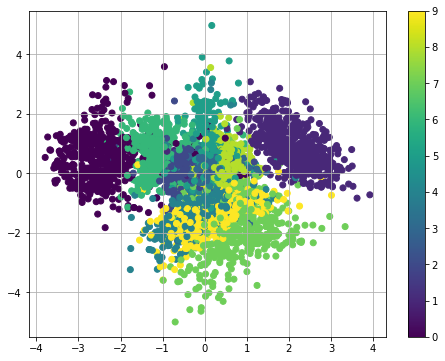

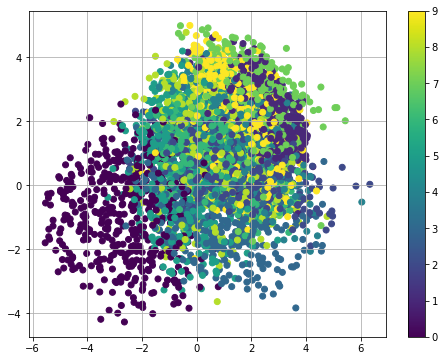

In [11]:
def plot_latent_space_scatterplot(model):
    # Scatter plot of the lagent representations of X, colored by labels.
    x_sample, y_sample = mnist.test.next_batch(5000)
    z_mu = model.transform(x_sample)
    plt.figure(figsize=(8, 6)) 
    plt.scatter(z_mu[:, 0], z_mu[:, 1], c=np.argmax(y_sample, 1))
    plt.colorbar()
    plt.grid()

plot_latent_space_scatterplot(vae)

# TODO: Do the same thing for Wake-Sleep.
plot_latent_space_scatterplot(ws)


## VI. Latent Space Visualization (Part 2)

Finally, we provide code that uses the generator network to plot reconstructions at the positions in the latent space for which they have been generated.

The code below does the following:

1. Let $\{\mathbf{z}^{(i)} = (\mathbf{z}_1^{(i)}, \mathbf{z}_2^{(i)})\}_{i=1}^{5000}$ be the latent representations of 5000 images from the test set.

2. Let $\mathcal{Z}_1$ consist of 15 evenly spaced points between the interval $\left[ \min_i \textbf{z}_1^{(i)}, \max_i \textbf{z}_1^{(i)} \right]$, and similarly, let $\mathcal{Z}_2$ consist of 15 evenly spaced points between $\left[ \min_i \textbf{z}_2^{(i)}, \max_i \textbf{z}_2^{(i)} \right]$.

3. For each $\mathbf{z} = (\mathbf{z}_1, \mathbf{z}_2) \in \mathcal{Z}_1 \times \mathcal{Z}_2$, generate and visualize digits using the trained model, and tile the digits into a $15 \times 15$ grid.

**TODO**: Run this code to visualize the latent space reconstructions. Briefly compare the results for Wake-Sleep vs. AEVB.  (You just need to uncomment the last line to run it for Wake-Sleep.)


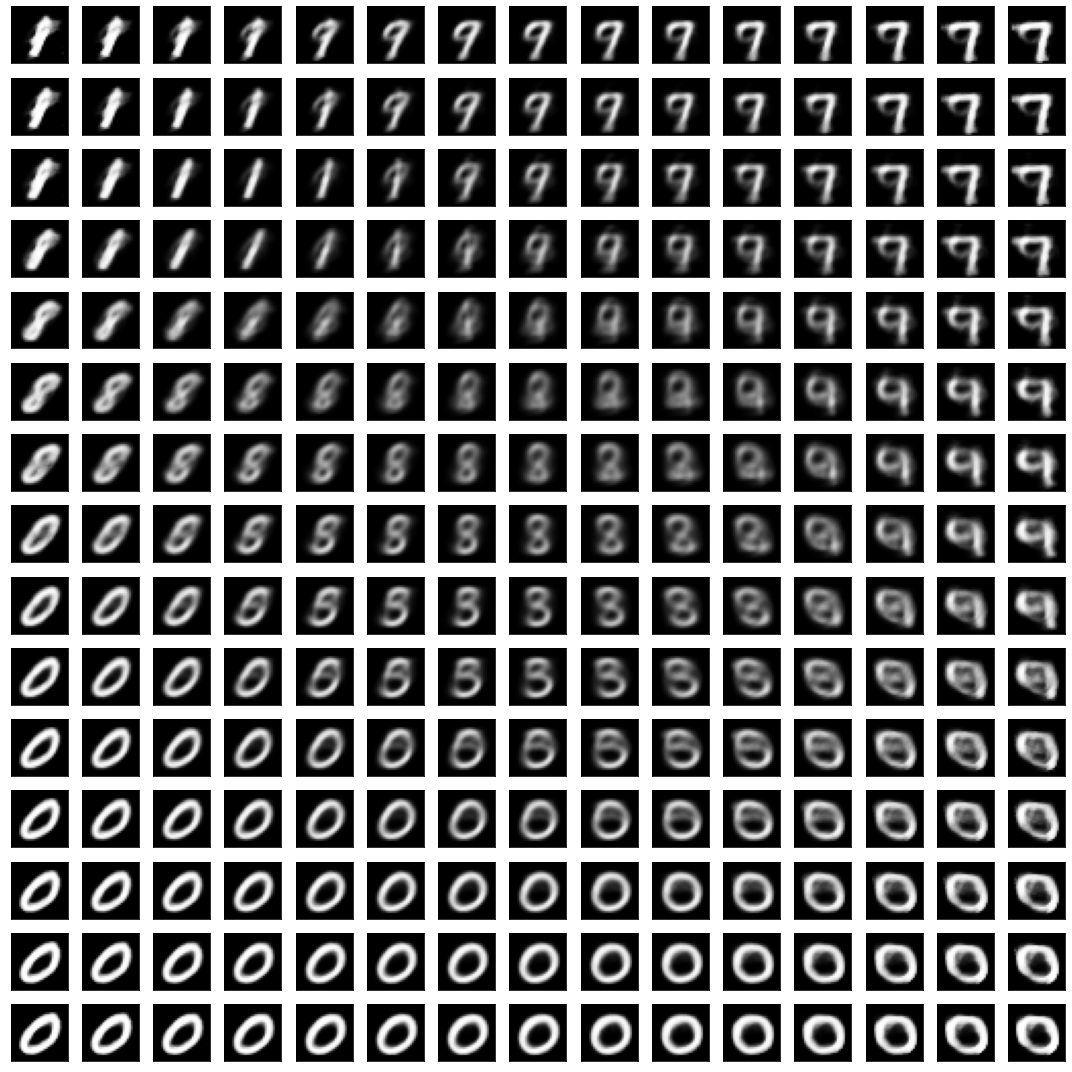

In [23]:
def plot_latent_space(X, model):
    # Plot images generated from latent space.
    z_mu = model.transform(X)
    z0_min, z1_min = np.min(z_mu, axis=0)
    z0_max, z1_max = np.max(z_mu, axis=0)
    Z = [[z0, z1] for z0 in np.linspace(z0_min, z0_max, 15)
                  for z1 in np.linspace(z1_min, z1_max, 15)]
    x_reconstr = model.generate(Z)
    plot_mnist(x_reconstr, nrows=15, ncols=15)

# Sample 100 MNIST images from the test set.
x_test, y_test = mnist.test.next_batch(5000)

plot_latent_space(x_test, vae)

# TODO: Do the same thing for Wake-Sleep.
plot_latent_space(x_test, ws)